In [113]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import strip_accents_ascii, strip_accents_unicode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [114]:
test_player = pd.read_csv('player_stats_old.csv')
test_player.drop(["Unnamed: 0"], axis=1, inplace = True)
test_player.rename(columns = {"Years in League":"YSE"}, inplace = True)
test_player

,YSE,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0.0,77752,1947-48,0,1610610036,WAS,24.0,37.0,NaN,NaN,...,0.508,NaN,NaN,NaN,18.0,NaN,NaN,NaN,85.0,156.0
1,1.0,77752,1948-49,0,1610610036,WAS,25.0,50.0,NaN,NaN,...,0.515,NaN,NaN,NaN,43.0,NaN,NaN,NaN,119.0,191.0
2,2.0,77752,1949-50,0,1610610036,WAS,26.0,68.0,NaN,NaN,...,0.739,NaN,NaN,NaN,74.0,NaN,NaN,NaN,247.0,474.0
3,3.0,77752,1950-51,0,1610610036,WAS,27.0,17.0,NaN,NaN,...,0.641,NaN,NaN,37.0,25.0,NaN,NaN,NaN,48.0,67.0
4,0.0,988,1996-97,0,1610612745,HOU,22.0,64.0,0.0,982.0,...,0.646,32.0,62.0,94.0,155.0,39.0,12.0,102.0,107.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23798,6.0,293,1994-95,0,1610612752,NYK,29.0,76.0,58.0,2150.0,...,0.792,144.0,180.0,324.0,120.0,49.0,95.0,147.0,286.0,966.0
23799,7.0,293,1995-96,0,1610612752,NYK,30.0,41.0,4.0,890.0,...,0.709,59.0,101.0,160.0,29.0,18.0,51.0,61.0,124.0,303.0
23800,8.0,293,1995-96,0,1610612759,SAN,30.0,32.0,30.0,826.0,...,0.767,74.0,128.0,202.0,36.0,32.0,29.0,45.0,100.0,306.0
23801,9.0,293,1995-96,0,0,TOT,30.0,73.0,34.0,1716.0,...,0.730,133.0,229.0,362.0,65.0,50.0,80.0,106.0,224.0,609.0


In [115]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer.fit(test_player)

SimpleImputer(fill_value=0, strategy='constant')

In [116]:
test_player['YSE'] = test_player['YSE'].astype('int64')
test_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803 entries, 0 to 23802
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YSE                23803 non-null  int64  
 1   PLAYER_ID          23803 non-null  int64  
 2   SEASON_ID          23803 non-null  object 
 3   LEAGUE_ID          23803 non-null  int64  
 4   TEAM_ID            23803 non-null  int64  
 5   TEAM_ABBREVIATION  23803 non-null  object 
 6   PLAYER_AGE         23803 non-null  float64
 7   GP                 23803 non-null  float64
 8   GS                 18300 non-null  float64
 9   MIN                23038 non-null  float64
 10  FGM                23803 non-null  float64
 11  FGA                23803 non-null  float64
 12  FG_PCT             23789 non-null  float64
 13  FG3M               18654 non-null  float64
 14  FG3A               18654 non-null  float64
 15  FG3_PCT            18434 non-null  float64
 16  FTM                238

In [117]:
test_player["PPG"] = test_player["PTS"]/test_player["GP"]
test_player["APG"] = test_player["AST"]/test_player["GP"]
test_player["TRPG"] = test_player["REB"]/test_player["GP"]
test_player["ORPG"] = test_player["OREB"]/test_player["GP"]
test_player["DRPG"] = test_player["DREB"]/test_player["GP"]
test_player["BPG"] = test_player["BLK"]/test_player["GP"]
test_player["SPG"] = test_player["STL"]/test_player["GP"]
test_player["TPG"] = test_player["TOV"]/test_player["GP"]
test_player["FPG"] = test_player["PF"]/test_player["GP"]
test_player["3PG"] = test_player["FG3M"]/test_player["GP"]
test_player["MPG"] = test_player["MIN"]/test_player["GP"]
test_player['FTA_PG'] = test_player['FTA']/test_player['GP']

In [118]:
test_player['ALLSTAR'] = 0

In [119]:
player_list = pd.read_csv('player_list.csv')
player_list.drop(["Unnamed: 0"], axis=1, inplace = True)


In [120]:
def get_player_name(ind):
    id = player_df.loc[ind]['id']
    first_name = player_df.loc[ind]['first_name']
    last_name = player_df.loc[ind]['last_name']
    name = "{}_{}.csv".format(first_name, last_name)
    return name

In [121]:
test_player['YSE'] = test_player['YSE'] + 1

In [122]:
def get_year(year):
    int_year = int(year.split("-")[0])+1
    return int_year

In [123]:
test_player['YEAR'] = test_player['SEASON_ID'].apply(lambda x: get_year(x))

In [124]:
test_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803 entries, 0 to 23802
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YSE                23803 non-null  int64  
 1   PLAYER_ID          23803 non-null  int64  
 2   SEASON_ID          23803 non-null  object 
 3   LEAGUE_ID          23803 non-null  int64  
 4   TEAM_ID            23803 non-null  int64  
 5   TEAM_ABBREVIATION  23803 non-null  object 
 6   PLAYER_AGE         23803 non-null  float64
 7   GP                 23803 non-null  float64
 8   GS                 18300 non-null  float64
 9   MIN                23038 non-null  float64
 10  FGM                23803 non-null  float64
 11  FGA                23803 non-null  float64
 12  FG_PCT             23789 non-null  float64
 13  FG3M               18654 non-null  float64
 14  FG3A               18654 non-null  float64
 15  FG3_PCT            18434 non-null  float64
 16  FTM                238

In [125]:
def normalize_txt(txt):
    return strip_accents_unicode(txt)

In [131]:
all_allstar = pd.read_csv('allstar_players.csv')
all_allstar = all_allstar.drop(all_allstar[all_allstar.year < 1976].index)
all_allstar = all_allstar.drop(all_allstar[all_allstar.player == "Eddie Johnson"].index)
all_allstar['player'] = all_allstar['player'].apply(lambda x: normalize_txt(x))

allstar_l = all_allstar.values.tolist()
for player in allstar_l:
    year = player[1]
    name = player[2]
    index = player_list.loc[player_list['full_name'] == name].index[0]
    player_id = player_list.loc[index]['id']
    stat_index = test_player.loc[(test_player['PLAYER_ID'] == player_id) & (test_player['YEAR'] == year)].index[0]
    test_player.at[stat_index, 'ALLSTAR'] = 1


    

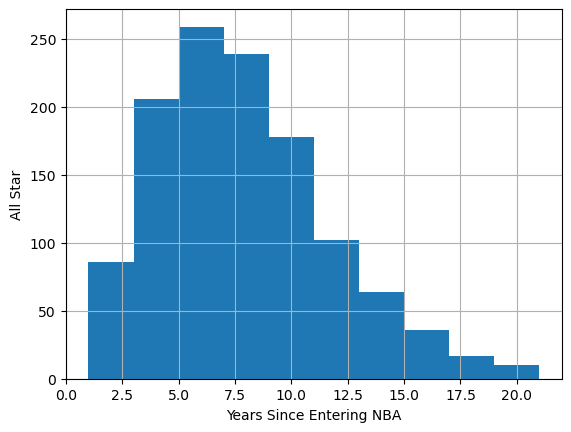

In [308]:
allstars = test_player[test_player["ALLSTAR"] == 1]['YSE']

allstar_hist = allstars.hist()
allstar_hist.set_xlabel("Years Since Entering NBA")
allstar_hist.set_ylabel("All Star")
plt.show()

In [133]:
test_player['ALLNBA'] = 0
test_player['ALLDEF'] = 0
test_player['ALLROOKIE'] = 0
test_player['MIP'] = 0
test_player['SIXTHM'] = 0
test_player['DPOY'] = 0
test_player['ROTY'] = 0
test_player['MVP'] = 0

In [134]:
def add_player_awards(data, col):
    temp_df = pd.DataFrame().assign(Player=data['Player'].apply(lambda x: normalize_txt(x)), Season=data['Season'].apply(lambda x: get_year(x)))
    temp_df = temp_df.drop(temp_df[temp_df.Season < 1976].index)
    award_list = temp_df.values.tolist()
    #print(award_list)
    for player in award_list:
        name = player[0]
        year = player[1]
        #print(name)
        index = player_list.loc[player_list['full_name'] == name].index[0]
        player_id = player_list.loc[index]['id']
        stat_index = test_player.loc[(test_player['PLAYER_ID'] == player_id) & (test_player['YEAR'] == year)].index[0]
        test_player.at[stat_index, col] = 1

    
    

In [135]:
allmostimpr = pd.read_csv('allmostimproved.csv')
add_player_awards(allmostimpr, 'MIP')

In [136]:
alldpoy = pd.read_csv('alldpoy.csv')
add_player_awards(alldpoy, 'DPOY')

In [137]:
allroty = pd.read_csv('allroty.csv')
add_player_awards(allroty, 'ROTY')

In [138]:
allsixthman = pd.read_csv('allsixthman.csv')
add_player_awards(allsixthman, 'SIXTHM')

In [139]:
allmvp = pd.read_csv('allnbamvp.csv')
add_player_awards(allmvp, 'MVP')

In [140]:
def cleanup_allnba(p):
    temp = p.split(" ")
    if temp[0] == "Metta":
        name = "{} {} {}".format(temp[0], temp[1], temp[2])
    else:
        name = "{} {}".format(temp[0], temp[1])
    return name

In [141]:
allnba = pd.read_csv('allnba_peryear.csv')
p_num = ['p1', 'p2', 'p3', 'p4', 'p5']
for p in p_num:
    allnba[p] = allnba[p].apply(lambda x: normalize_txt(x))
    allnba[p] = allnba[p].apply(lambda x: cleanup_allnba(x))
    

In [290]:
def add_team_awards(data, col):
    temp_df = pd.DataFrame().assign(Season=data['Season'].apply(lambda x: get_year(x)),
                                    Tm=data['Tm'],
                                    p1=data['p1'].apply(lambda x: normalize_txt(x)),
                                    p2=data['p2'].apply(lambda x: normalize_txt(x)),
                                    p3=data['p3'].apply(lambda x: normalize_txt(x)), 
                                    p4=data['p4'].apply(lambda x: normalize_txt(x)),
                                    p5=data['p5'].apply(lambda x: normalize_txt(x))) 
                                    
    temp_df = temp_df.drop(temp_df[temp_df.Season < 1977].index)
    award_list = temp_df.values.tolist()
    
    for t in award_list:
        year = t[0]
        team = int(t[1][0])
        for name in t[2:]:
            index = player_list.loc[player_list['full_name'] == name].index[0]
            player_id = player_list.loc[index]['id']
            stat_index = test_player.loc[(test_player['PLAYER_ID'] == player_id) & (test_player['YEAR'] == year)].index[0]
            test_player.at[stat_index, col] = 1#team
            
        

In [291]:
add_team_awards(allnba, 'ALLNBA')

In [292]:
alldefense = pd.read_csv('alldefense_peryear.csv')
add_team_awards(alldefense, 'ALLDEF')

In [293]:
allrookieteam = pd.read_csv('allnbarookie.csv')
add_team_awards(allrookieteam, 'ALLROOKIE')

In [294]:
f_allstar = pd.read_csv("f_allstar_yr.csv")
f_allstar.drop(["Unnamed: 0"], axis=1, inplace = True)
f_allstar_l = f_allstar.values.tolist()

In [297]:
test_player['EFG_RATE'] = (test_player['FGM'] + (0.5 * test_player['FG3M']))/test_player['FGA']
test_player['FTA_RATE'] = test_player['FTA']/test_player['FGA']
test_player['TOV_RATE'] = 100*test_player['TOV']/(test_player['FGA'] +(0.44 * test_player['FTA']) + test_player['AST'] + test_player['TOV'])
test_player['TS_RATE'] = test_player['PTS']/(2 * (test_player['FGA'] + (0.44 * test_player['FTA'])))


In [298]:
test_player.to_csv("player_stats_cats.csv")